In [33]:
!pip install datasets transformers evaluate sentencepiece accelerate


In [88]:
from datasets import load_dataset
    
dataset = load_dataset("go_emotions", "simplified")
    
labels = dataset['train'].features["labels"].feature.names
label2id = {label_:id for id, label_ in enumerate(labels)}
id2label = {id:label_ for label_, id in label2id.items()}


In [35]:
label2id

{'admiration': 0,
 'amusement': 1,
 'anger': 2,
 'annoyance': 3,
 'approval': 4,
 'caring': 5,
 'confusion': 6,
 'curiosity': 7,
 'desire': 8,
 'disappointment': 9,
 'disapproval': 10,
 'disgust': 11,
 'embarrassment': 12,
 'excitement': 13,
 'fear': 14,
 'gratitude': 15,
 'grief': 16,
 'joy': 17,
 'love': 18,
 'nervousness': 19,
 'optimism': 20,
 'pride': 21,
 'realization': 22,
 'relief': 23,
 'remorse': 24,
 'sadness': 25,
 'surprise': 26,
 'neutral': 27}

In [36]:
for i in range(30):
    print(f"TEXT: {dataset['train'][i]['text']}   LABEL:{dataset['train'][i]['labels']}   ID:{dataset['train'][i]['id']}")

TEXT: My favourite food is anything I didn't have to cook myself.   LABEL:[27]   ID:eebbqej
TEXT: Now if he does off himself, everyone will think hes having a laugh screwing with people instead of actually dead   LABEL:[27]   ID:ed00q6i
TEXT: WHY THE FUCK IS BAYLESS ISOING   LABEL:[2]   ID:eezlygj
TEXT: To make her feel threatened   LABEL:[14]   ID:ed7ypvh
TEXT: Dirty Southern Wankers   LABEL:[3]   ID:ed0bdzj
TEXT: OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe PlAyOfFs! Dumbass Broncos fans circa December 2015.   LABEL:[26]   ID:edvnz26
TEXT: Yes I heard abt the f bombs! That has to be why. Thanks for your reply:) until then hubby and I will anxiously wait 😝   LABEL:[15]   ID:ee3b6wu
TEXT: We need more boards and to create a bit more space for [NAME]. Then we’ll be good.   LABEL:[8, 20]   ID:ef4qmod
TEXT: Damn youtube and outrage drama is super lucrative for reddit   LABEL:[0]   ID:ed8wbdn
TEXT: It might be linked to the trust factor of your friend.   LABEL:[27]   ID:eczgv1o
TEXT: Dem

In [37]:
# Assuming you have already loaded the dataset and it's stored in a variable named 'dataset'

total_length = 0
total_texts = 0
for split in dataset:
        texts = dataset[split]['text']
        total_texts += len(texts)
        for text in texts:
            total_length += len(text)
            

average_length = total_length / total_texts

print("Average length of text:", average_length)

Average length of text: 68.32755284447967


In [38]:
import re

# Assuming you have already loaded the dataset and it's stored in a variable named 'dataset'

def calculate_average_word_count(dataset):
    total_word_count = 0
    total_texts = 0

    for split in dataset:
        texts = dataset[split]['text']
        for text in texts:
            # Split text into words using whitespace as delimiter
            words = re.findall(r'\b\w+\b', text)  # This regex pattern extracts words
            total_word_count += len(words)
            total_texts += 1

    average_word_count = total_word_count / total_texts
    return average_word_count

avg_word_count = calculate_average_word_count(dataset)

print("Average number of words in all sets combined:", avg_word_count)


Average number of words in all sets combined: 13.30728120450399


In [39]:
# Assuming you have already loaded the dataset and it's stored in a variable named 'dataset'
def calculate_average_labels_per_sample(dataset):
    total_label_count = 0
    total_samples = 0
    max_labels = 0
    for split in dataset:
        labels = dataset[split]['labels']
        total_samples += len(labels)
        for label_list in labels:
            total_label_count += len(label_list)
            if len(label_list) > max_labels:
                max_labels = len(label_list)
    print(f"Maximum number of labels per data sample is {max_labels}" )

    average_labels_per_sample = total_label_count / total_samples
    return average_labels_per_sample

avg_labels_per_sample = calculate_average_labels_per_sample(dataset)

print("Average number of labels per data sample:", avg_labels_per_sample)


Maximum number of labels per data sample is 5
Average number of labels per data sample: 1.175976263752465


In [80]:
label_counts = defaultdict(int)
for labels in dataset['train']["labels"]:
    for label in labels:
        label_counts[label] += 1

# Print the label counts
for label, count in label_counts.items():
    print(f"{id2label[label]}: {count} data points")

neutral: 14219 data points
anger: 1567 data points
fear: 596 data points
annoyance: 2470 data points
surprise: 1060 data points
gratitude: 2662 data points
desire: 641 data points
optimism: 1581 data points
admiration: 4130 data points
confusion: 1368 data points
amusement: 2328 data points
approval: 2939 data points
caring: 1087 data points
embarrassment: 303 data points
realization: 1110 data points
disappointment: 1269 data points
grief: 77 data points
sadness: 1326 data points
curiosity: 2191 data points
joy: 1452 data points
love: 2086 data points
excitement: 853 data points
disapproval: 2022 data points
remorse: 545 data points
disgust: 793 data points
relief: 153 data points
pride: 111 data points
nervousness: 164 data points


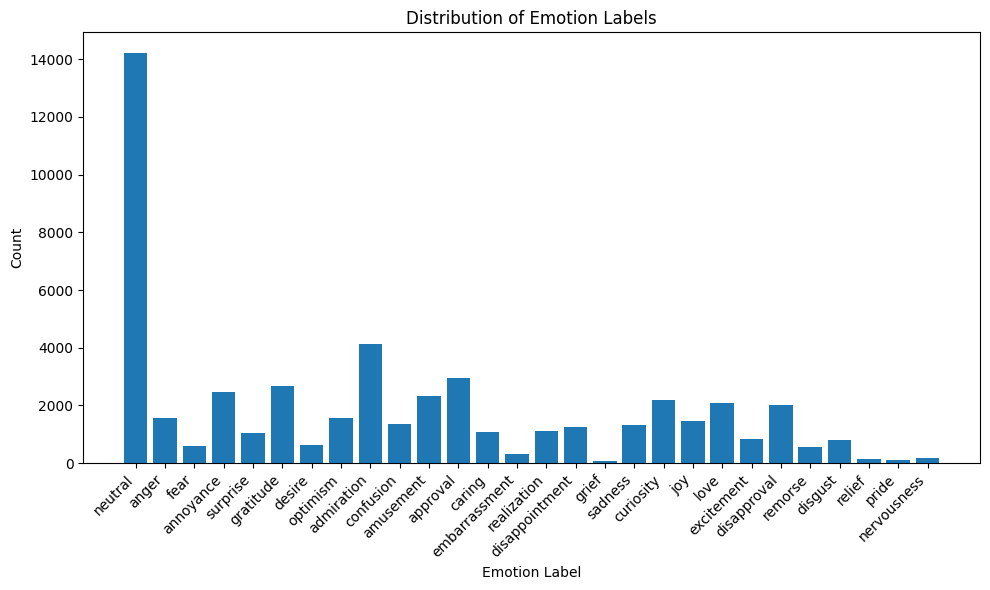

In [69]:
from collections import defaultdict
import matplotlib.pyplot as plt

# Your label counts code
label_counts = defaultdict(int)
for labels in dataset['train']["labels"]:
    for label in labels:
        label_counts[label] += 1

# Convert label IDs to their corresponding names
label_names = [id2label[label] for label in label_counts.keys()]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(label_names, label_counts.values())
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.title('Distribution of Emotion Labels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [84]:
# Define the label of interest
label_of_interest = 'gratitude'
label_of_interest = label2id[label_of_interest]

# Filter and print some texts with the 'gratitude' label
texts_with_gratitude_label = []

for text, labels in zip(dataset['train']["text"], dataset['train']["labels"]):
    if label_of_interest in labels:
        texts_with_gratitude_label.append(text)
        
count_text_with_thank_and_gratitude = 0
for text, labels in zip(dataset['train']["text"], dataset['train']["labels"]):
    if "thank" in text.lower() and label_of_interest in labels and label_of_interest in labels:
        count_text_with_thank_and_gratitude += 1
        
# Print some texts with the 'gratitude' label
for i, text in enumerate(texts_with_gratitude_label[:10]):  # Print the first 5 texts
    print(f"Text {i+1}: {text}\n")
print(count_text_with_thank_and_gratitude)

Text 1: Yes I heard abt the f bombs! That has to be why. Thanks for your reply:) until then hubby and I will anxiously wait 😝

Text 2: Thank you friend

Text 3: Super, thanks

Text 4: aw, thanks! I appreciate that! 

Text 5: Thanks! I love watching him every week

Text 6: Very interesting. Thx

Text 7: Thanks DB, I'll see if I can find the book

Text 8: Awesome. Thanks!

Text 9: Awesome! I’m a cradle [RELIGION], so really interesting to hear your experience. Thanks for sharing.

Text 10: Thank you for at least doing something good sir.

2255


In [40]:
from transformers import AutoTokenizer

checkpoint = "bert-base-uncased"

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [41]:
def preprocess_function(example):
   text = example['text']
   all_labels = example['labels']
   classes = [0.0 for i in range(len(labels))]
   for label in all_labels:
       label_id = label
       classes[label_id] = 1.0
  
   example = tokenizer(text, truncation=True, max_length = 128)
   example['labels'] = classes
   return example

tokenized_dataset = dataset.map(preprocess_function)

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [42]:
import torch

In [43]:
tokenized_dataset.set_format("torch")
tokenized_dataset = (tokenized_dataset
          .map(lambda x : {"float_labels": x["labels"].to(torch.float)}, remove_columns=["labels"])
          .rename_column("float_labels", "labels"))

Map:   0%|          | 0/43410 [00:00<?, ? examples/s]

Map:   0%|          | 0/5426 [00:00<?, ? examples/s]

Map:   0%|          | 0/5427 [00:00<?, ? examples/s]

In [44]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

2024-04-11 14:04:41.083056: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 14:04:41.083153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 14:04:41.215613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [45]:
import evaluate
import numpy as np

clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])

def sigmoid(x):
   return 1/(1 + np.exp(-x))

def compute_metrics(eval_pred):
   predictions, labels = eval_pred
   predictions = sigmoid(predictions)
   predictions = (predictions > 0.5).astype(int).reshape(-1)
   return clf_metrics.compute(predictions=predictions, references=labels.astype(int).reshape(-1))

In [46]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(

   checkpoint, num_labels=len(labels),
                       problem_type = "multi_label_classification")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
training_args = TrainingArguments(

   output_dir="my_awesome_model",
   learning_rate=2e-5,
   per_device_train_batch_size=8,
   per_device_eval_batch_size=8,
   num_train_epochs=2,
   weight_decay=0.01,
   evaluation_strategy="epoch",
   save_strategy="epoch",
   load_best_model_at_end=True,
)

trainer = Trainer(

   model=model,
   args=training_args,
   train_dataset=tokenized_dataset["train"],
   eval_dataset=tokenized_dataset["validation"],
   tokenizer=tokenizer,
   data_collator=data_collator,
   compute_metrics=compute_metrics,    

)

trainer.train()


/opt/conda/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.093500,0.088378,0.969499,0.547726,0.725815,0.439812
2,0.078400,0.084026,0.970150,0.573738,0.716600,0.478370


TrainOutput(global_step=10854, training_loss=0.0965209006384545, metrics={'train_runtime': 743.789, 'train_samples_per_second': 116.727, 'train_steps_per_second': 14.593, 'total_flos': 1413106670899872.0, 'train_loss': 0.0965209006384545, 'epoch': 2.0})

In [48]:
# Evaluate the model on the test dataset
results = trainer.evaluate(tokenized_dataset["test"])

# Extract the metrics from the results
test_f1_score = results['eval_f1']
test_precision = results['eval_precision']
test_recall = results['eval_recall']

print("Test F1 Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)


Test F1 Score: 0.5823602012721921
Test Precision: 0.7295432921027593
Test Recall: 0.4845947227050087


In [50]:
all_probabilities = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Process the dataset in batches
batch_size = 8  # Adjust batch size as needed
for i in range(0, len(dataset['test']), batch_size):
    batch = dataset['test'][i:i+batch_size]

    # Tokenize the text
    inputs = tokenizer(batch["text"], return_tensors="pt", padding=True, truncation=True).to(device)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the logits
    logits = outputs.logits

    # Apply sigmoid function to obtain probabilities
    probabilities = torch.sigmoid(logits)

    # Move probabilities to CPU and convert to numpy array
    probabilities_array = probabilities.cpu().numpy()

    # Append probabilities to the list
    all_probabilities.extend(probabilities_array)

# Convert list to numpy array
all_probabilities = np.array(all_probabilities)

In [51]:
from sklearn import metrics

In [52]:
num_items, num_labels = len(dataset['test']), len(labels)
y_targets_all = np.zeros((num_items, num_labels), dtype=int)
for i, labels_indices in enumerate(dataset['test']["labels"]):
    for label_index in labels_indices:
        y_targets_all[i, label_index] = 1

In [53]:
threshold = 0.5
y_preds_all = all_probabilities > threshold

print("Overall (micro)")
print("===============")
print(f"Accuracy: {metrics.accuracy_score(y_targets_all, y_preds_all):.3f}")
print(f"Precision: {metrics.precision_score(y_targets_all, y_preds_all, average='micro', zero_division=0):.3f}")
print(f"Recall: {metrics.recall_score(y_targets_all, y_preds_all, average='micro', zero_division=0):.3f}")
print(f"F1: {metrics.f1_score(y_targets_all, y_preds_all, average='micro', zero_division=0):.3f}")

Overall (micro)
Accuracy: 0.460
Precision: 0.730
Recall: 0.485
F1: 0.582


In [54]:
def calc_label_metrics(label, y_targets, y_preds, threshold):
    return {
        "label": label,
        "accuracy": metrics.accuracy_score(y_targets, y_preds),
        "precision": metrics.precision_score(y_targets, y_preds, zero_division=0),
        "recall": metrics.recall_score(y_targets, y_preds, zero_division=0),
        "f1": metrics.f1_score(y_targets, y_preds, zero_division=0),
        "mcc": metrics.matthews_corrcoef(y_targets, y_preds),
        "support": y_targets.sum(),
        "threshold": threshold,
    }

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [64]:
threshold = 0.5
y_preds_all = (all_probabilities > threshold).astype(int)

results = []
for label_index, label in enumerate(labels):
    y_targets, y_preds = y_targets_all[:, label_index], y_preds_all[:, label_index]
    results.append(calc_label_metrics(label, y_targets, y_preds, threshold))

per_label_results = pd.DataFrame(results, index=labels)
display(per_label_results.drop(columns=["label"]).round(3))

,accuracy,precision,recall,f1,mcc,support,threshold
admiration,0.946,0.711,0.704,0.708,0.678,504,0.5
amusement,0.982,0.804,0.841,0.822,0.813,264,0.5
anger,0.971,0.676,0.379,0.485,0.493,198,0.5
annoyance,0.943,0.739,0.053,0.099,0.188,320,0.5
approval,0.943,0.646,0.271,0.382,0.395,351,0.5
caring,0.978,0.652,0.222,0.331,0.372,135,0.5
confusion,0.975,0.614,0.281,0.386,0.405,153,0.5
curiosity,0.954,0.573,0.500,0.534,0.511,284,0.5
desire,0.988,0.730,0.325,0.450,0.482,83,0.5
disappointment,0.972,0.500,0.007,0.013,0.055,151,0.5


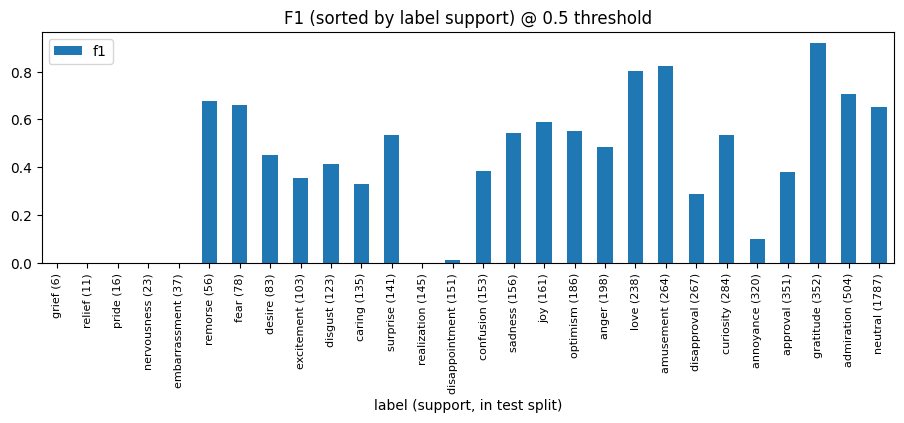

In [57]:
per_label_results["label (support)"] = (
    per_label_results.index + " (" + per_label_results["support"].astype(str) + ")"
)
ax = per_label_results.sort_values(by="support").plot.bar(
    x="label (support)",
    y=["f1"],
    rot=90,
    title="F1 (sorted by label support) @ 0.5 threshold",
    figsize=(11,3),
)
ax.tick_params(axis='x', which='major', labelsize=8)
ax.axes.xaxis.label.set_text(f"label (support, in test split)")
plt.show()

In [114]:
def dataset_wide_metrics(df):
    simple_mean = {
        m: round(df[m].mean(), 3)
        for m in ["precision", "recall", "f1", "mcc"]
    }
    print("Simple mean of labels:", simple_mean)
    weighted = {
        m: round(sum(df[m] * df["support"]) / df["support"].sum(), 3)
        for m in ["precision", "recall", "f1", "mcc"]
    }
    print("Weighted average (using support):", weighted)
    return simple_mean, weighted

_ = dataset_wide_metrics(per_label_results)

Simple mean of labels: {'precision': 0.554, 'recall': 0.349, 'f1': 0.4, 'mcc': 0.407}
Weighted average (using support): {'precision': 0.688, 'recall': 0.485, 'f1': 0.541, 'mcc': 0.509}


In [103]:
threshold_results = {}
for t in tqdm(range(0, 100, 5)):
    threshold = t / 100
    y_preds_all = (all_probabilities > threshold).astype(int)
    threshold_results[threshold] = []
    for label_index, label in enumerate(labels):
        y_targets, y_preds = y_targets_all[:, label_index], y_preds_all[:, label_index]
        threshold_results[threshold].append(calc_label_metrics(label, y_targets, y_preds, threshold))

100%|██████████| 20/20 [00:09<00:00,  2.08it/s]


In [98]:
metric_name = "f1"
best = {label: {metric_name: -1, "result": None} for label in labels}
for threshold, results in threshold_results.items():
    for result in results:
        label = result["label"]
        if result[metric_name] > best[label][metric_name]:
            best[label] = {metric_name: result[metric_name], "result": result}

results = [b["result"] for b in best.values()]
per_label_threshold_results = pd.DataFrame(results, index=[result["label"] for result in results])
display(per_label_threshold_results.drop(columns=["label"]).round(3))

,accuracy,precision,recall,f1,mcc,support,threshold
admiration,0.944,0.680,0.750,0.713,0.683,504,0.40
amusement,0.982,0.768,0.913,0.834,0.828,264,0.30
anger,0.969,0.617,0.414,0.495,0.490,198,0.45
annoyance,0.915,0.324,0.412,0.363,0.321,320,0.25
approval,0.942,0.585,0.353,0.440,0.426,351,0.40
caring,0.972,0.430,0.430,0.430,0.415,135,0.25
confusion,0.959,0.368,0.647,0.469,0.469,153,0.20
curiosity,0.947,0.499,0.708,0.585,0.568,284,0.35
desire,0.987,0.603,0.494,0.543,0.539,83,0.20
disappointment,0.964,0.323,0.285,0.303,0.285,151,0.20


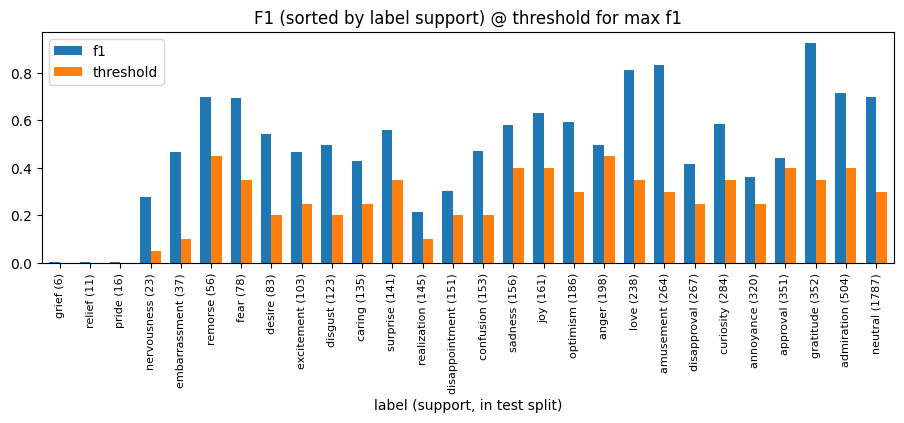

In [99]:
per_label_threshold_results["label (support)"] = (
    per_label_threshold_results["label"] + " (" + per_label_threshold_results["support"].astype(str) + ")"
)
ax = per_label_threshold_results.sort_values(by="support").plot.bar(
    x='label (support)',
    y=["f1", "threshold"],
    rot=90,
    title="F1 (sorted by label support) @ threshold for max f1",
    width=0.7,
    figsize=(11,3),
)
ax.tick_params(axis='x', which='major', labelsize=8)
ax.axes.xaxis.label.set_text(f"label (support, in test split)")
plt.show()

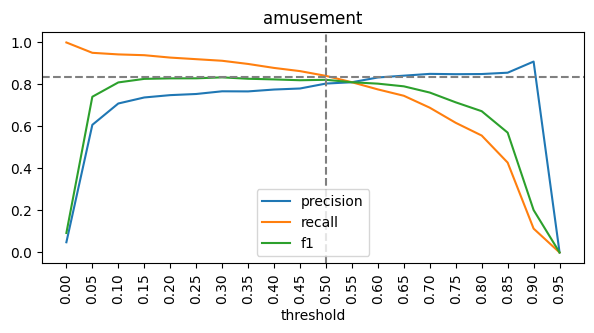

In [100]:
_label_name = "amusement"
label_per_threshold_results = []
for threshold, results in threshold_results.items():
    for result in results:
        if result["label"] == _label_name:
            label_per_threshold_results.append(result)

label_per_threshold_results = pd.DataFrame(
    label_per_threshold_results, index=[r["threshold"] for r in label_per_threshold_results]
)
ax = label_per_threshold_results.plot.line(
    x="threshold", y=["precision", "recall", "f1"], rot=90, title=_label_name, figsize=(7,3)
)
ax.axvline(0.5, color='gray', linestyle='--')
ax.axhline(label_per_threshold_results["f1"].max(), color="gray", linestyle="--")
ax.xaxis.set_ticks(np.arange(0, 1, 0.05))
plt.show()

In [115]:
print("### Threshold set to arbitary 0.5")
_before = dataset_wide_metrics(per_label_results)
print()
print("### Threshold from per label search (for best F1 score)")
_after = dataset_wide_metrics(per_label_threshold_results)

print()
percentage = (_after[0]["f1"] - _before[0]["f1"]) / _before[0]["f1"] * 100
print(f"F1 (simple mean) improved by {round(percentage, 1)}%")
percentage = (_after[1]["f1"] - _before[1]["f1"]) / _before[0]["f1"] * 100
print(f"F1 (weighted) improved by {round(percentage, 1)}%")


### Threshold set to arbitary 0.5
Simple mean of labels: {'precision': 0.554, 'recall': 0.349, 'f1': 0.4, 'mcc': 0.407}
Weighted average (using support): {'precision': 0.688, 'recall': 0.485, 'f1': 0.541, 'mcc': 0.509}

### Threshold from per label search (for best F1 score)
Simple mean of labels: {'precision': 0.491, 'recall': 0.611, 'f1': 0.49, 'mcc': 0.474}
Weighted average (using support): {'precision': 0.591, 'recall': 0.646, 'f1': 0.608, 'mcc': 0.551}

F1 (simple mean) improved by 22.5%
F1 (weighted) improved by 16.7%


In [118]:
all_probabilities = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Process the dataset in batches
batch_size = 8  # Adjust batch size as needed
for i in range(0, len(dataset['test']), batch_size):
    batch = dataset['validation'][i:i+batch_size]

    # Tokenize the text
    inputs = tokenizer(batch["text"], return_tensors="pt", padding=True, truncation=True).to(device)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the logits
    logits = outputs.logits

    # Apply sigmoid function to obtain probabilities
    probabilities = torch.sigmoid(logits)

    # Move probabilities to CPU and convert to numpy array
    probabilities_array = probabilities.cpu().numpy()

    # Append probabilities to the list
    all_probabilities.extend(probabilities_array)

# Convert list to numpy array
all_probabilities = np.array(all_probabilities)

In [131]:
num_items, num_labels = len(dataset['validation']), len(labels)
y_val_targets_all = np.zeros((num_items, num_labels), dtype=int)
for i, labels_indices in enumerate(dataset['validation']["labels"]):
    for label_index in labels_indices:
        y_val_targets_all[i, label_index] = 1

In [ ]:
num_items, num_labels = len(dataset['validation']), len(labels)
y_targets_all = np.zeros((num_items, num_labels), dtype=int)
for i, labels_indices in enumerate(dataset['validation']["labels"]):
    for label_index in labels_indices:
        y_targets_all[i, label_index] = 1

In [120]:
threshold_results = {}
for t in tqdm(range(0, 100, 5)):
    threshold = t / 100
    y_preds_all = (all_probabilities > threshold).astype(int)
    threshold_results[threshold] = []
    for label_index, label in enumerate(labels):
        y_targets, y_preds = y_targets_all[:, label_index], y_preds_all[:, label_index]
        threshold_results[threshold].append(calc_label_metrics(label, y_targets, y_preds, threshold))

100%|██████████| 20/20 [00:09<00:00,  2.05it/s]


In [132]:
test_threshold_results = {}

for threshold, test_results in threshold_results.items():
    test_threshold_results[threshold] = []
    
    for label_index, label in enumerate(labels):
        y_val_targets, y_val_preds = y_val_targets_all[:, label_index], y_val_preds_all[:, label_index]
        
        # Apply the threshold to validation predictions
        y_val_preds_thresholded = (y_val_preds > threshold).astype(int)
        
        # Calculate label metrics for validation data
        test_threshold_results[threshold].append(calc_label_metrics(label, y_val_targets, y_val_preds_thresholded, threshold))